# Proyect Applied Mathematics

We will use classifiers for the olympic games of Tokyo 2020

## Install libraries and import data

In [ ]:
pip install emoji

     |████████████████████████████████| 170 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=35eb2df291b2b6604c64050dee57ffc8a0a80795c897d09fecffbf5593b48906
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
import pandas as pd

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
from bs4 import BeautifulSoup
import emoji
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
text = 'I love this so much'   # Output: 'This is cool!'

# If you haven’t already, download the lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:

database = pd.read_csv('tokyo_2020_tweets.csv')
database

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id  ... is_retweet
0       1418888645105356803  ...      False
1       1418888377680678918  ...      False
2       1418888260886073345  ...      False
3       1418888172864299008  ...      False
4       1418886894478270464  ...      False
...                     ...  ...        ...
297006  1419947001102405633  ...      False
297007  1419946996895346689  ...      False
297008  1419946993909047299  ...      False
297009  1419946992948576256  ...      False
297010  1419946985214431232  ...      False

[297011 rows x 16 columns]

### Cleaning data

In [ ]:
def clean_tweet(text):
  text = str(text)
  tweet = BeautifulSoup(text).get_text() # Get text
  tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split()) #Remove hashtags
  tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split()) #remove urls 
  tweet = emoji.demojize(tweet) #Turn emojis into string values
  tweet = ' '.join(re.sub(":(\w+):", " ", tweet).split()) #remove emojis and such 
  tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=\_]", " ", tweet).split()) #remove symbols (Vader only works through words)
  tweet = ' '.join(re.sub("\d+", " ", tweet).split()) #remove digits 
  tweet = tweet.lower()
  return tweet

database['text'] = database['text'].apply(clean_tweet)

In [ ]:
database

id  ... is_retweet
0       1418888645105356803  ...      False
1       1418888377680678918  ...      False
2       1418888260886073345  ...      False
3       1418888172864299008  ...      False
4       1418886894478270464  ...      False
...                     ...  ...        ...
297006  1419947001102405633  ...      False
297007  1419946996895346689  ...      False
297008  1419946993909047299  ...      False
297009  1419946992948576256  ...      False
297010  1419946985214431232  ...      False

[297011 rows x 16 columns]


## Analyze polarity through Vader library

In [ ]:
def analyze(text):
  return analyzer.polarity_scores(text)


In [ ]:
database['sentiment_score'] = 0

In [ ]:
#for i in range(0,len(database['text'])): 

for i in range(len(database['text'])):
  try:
    score = str(analyze(database['text'][i]))
  except AttributeError:
    score = 'あ'
  database['sentiment_score'][i] = score


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
database

id  ...                                    sentiment_score
0       1418888645105356803  ...  {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...
1       1418888377680678918  ...  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
2       1418888260886073345  ...  {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...
3       1418888172864299008  ...  {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...
4       1418886894478270464  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
...                     ...  ...                                                ...
297006  1419947001102405633  ...  {'neg': 0.105, 'neu': 0.895, 'pos': 0.0, 'comp...
297007  1419946996895346689  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
297008  1419946993909047299  ...  {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...
297009  1419946992948576256  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
297010  1419946985214431232  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

[297011 rows x 17 columns]

In [ ]:
#Get rid of missing data
database = database[database['sentiment_score']!='あ']
database

id  ...                                    sentiment_score
0       1418888645105356803  ...  {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...
1       1418888377680678918  ...  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
2       1418888260886073345  ...  {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...
3       1418888172864299008  ...  {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...
4       1418886894478270464  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
...                     ...  ...                                                ...
297006  1419947001102405633  ...  {'neg': 0.105, 'neu': 0.895, 'pos': 0.0, 'comp...
297007  1419946996895346689  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
297008  1419946993909047299  ...  {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...
297009  1419946992948576256  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
297010  1419946985214431232  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

[297011 rows x 17 columns]

In [ ]:
#Separate score
def separate_score(text,number):
  text = str(text)
  text = text.split(',')
  number = re.findall("[-+]?\d*\.\d+|\d+",text[number])
  return float(number[0])
  #return text[number]

database['neg_score'] = database['sentiment_score'].apply(separate_score,number = 0)
database['neu_score'] = database['sentiment_score'].apply(separate_score,number = 1)
database['pos_score'] = database['sentiment_score'].apply(separate_score,number = 2)
database['com_score'] = database['sentiment_score'].apply(separate_score,number = 3)

In [ ]:
database

id  ... com_score
0       1418888645105356803  ...    0.4019
1       1418888377680678918  ...    0.5994
2       1418888260886073345  ...    0.8126
3       1418888172864299008  ...    0.6249
4       1418886894478270464  ...    0.0000
...                     ...  ...       ...
297006  1419947001102405633  ...   -0.2500
297007  1419946996895346689  ...    0.0000
297008  1419946993909047299  ...   -0.2960
297009  1419946992948576256  ...    0.0000
297010  1419946985214431232  ...    0.0000

[297011 rows x 21 columns]

In [ ]:
database[database['neg_score'] > 0.5]

id          user_name  ... pos_score com_score
363     1418888046322364418    Vaibhav Mukhija  ...       0.0   -0.4939
370     1418888002697371658             vikram  ...       0.0   -0.3182
625     1418887063550799884  The Tennis Talker  ...       0.0   -0.7351
736     1418886687518830598      Dr! RK Crosby  ...       0.0   -0.7264
869     1418886186941169676             anon69  ...       0.0   -0.5106
...                     ...                ...  ...       ...       ...
296801  1419948276544114689      GreekStylings  ...       0.0   -0.3818
296870  1419947879561527296           Veronica  ...       0.0   -0.5719
296891  1419947702243168257          Kailahh |  ...       0.0   -0.4588
296914  1419947575155826689    Franklin Kaweru  ...       0.0   -0.6249
296931  1419947465327919108       Robbienho 🇬🇧  ...       0.0   -0.6222

[1377 rows x 21 columns]

In [ ]:
database['sentiment_score'][2210]

"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}"

### Get class

In [ ]:
def create_class(score):
  if score > 0.33:
    return str('pos')
  elif score < -0.33:
    return str('neg')
  else:
    return str('neu')

#Positive is 3
#Negative is 1
#Neutral is 2

database['class'] = database['com_score'].apply(create_class)


In [ ]:
database

id                        user_name  ... com_score class
0       1418888645105356803               Abhishek Srivastav  ...    0.4019   pos
1       1418888377680678918         Saikhom Mirabai Channu🇮🇳  ...    0.5994   pos
2       1418888260886073345                     Big Breaking  ...    0.8126   pos
3       1418888172864299008  International Hockey Federation  ...    0.6249   pos
4       1418886894478270464                     Cameron Hart  ...    0.0000   neu
...                     ...                              ...  ...       ...   ...
297006  1419947001102405633                     Belgian Cats  ...   -0.2500   neu
297007  1419946996895346689                        IOC MEDIA  ...    0.0000   neu
297008  1419946993909047299                     Devin Heroux  ...   -0.2960   neu
297009  1419946992948576256            Ⓜ️𝐚𝐬𝐚 🍊 𝐌𝐫.𝐂𝐡𝐢𝐥𝐝𝐫𝐞𝐧 🌏  ...    0.0000   neu
297010  1419946985214431232            Oigetit Breaking News  ...    0.0000   neu

[297011 rows x 22 columns]

In [ ]:
print('Positive tweets:')
print(len(database[database['class'] == 'pos']))
print('Neutral tweets:')
print(len(database[database['class'] == 'neu']))
print('Negative tweets:')
print(len(database[database['class'] == 'neg']))

Positive tweets:
70426
Neutral tweets:
213019
Negative tweets:
13566


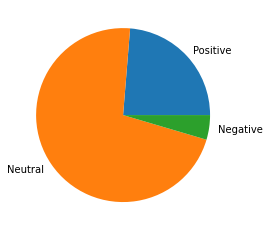

In [ ]:
y = np.array([len(database[database['class'] == 'pos']), len(database[database['class'] == 'neu']), len(database[database['class'] == 'neg'])])
mylabels = ["Positive", "Neutral", "Negative"]

plt.pie(y, labels = mylabels)
plt.show() 

In [ ]:
database.to_csv('modified_csv',index=False)

In [ ]:
database

id                        user_name  ... com_score class
0       1418888645105356803               Abhishek Srivastav  ...    0.4019   pos
1       1418888377680678918         Saikhom Mirabai Channu🇮🇳  ...    0.5994   pos
2       1418888260886073345                     Big Breaking  ...    0.8126   pos
3       1418888172864299008  International Hockey Federation  ...    0.6249   pos
4       1418886894478270464                     Cameron Hart  ...    0.0000   neu
...                     ...                              ...  ...       ...   ...
297006  1419947001102405633                     Belgian Cats  ...   -0.2500   neu
297007  1419946996895346689                        IOC MEDIA  ...    0.0000   neu
297008  1419946993909047299                     Devin Heroux  ...   -0.2960   neu
297009  1419946992948576256            Ⓜ️𝐚𝐬𝐚 🍊 𝐌𝐫.𝐂𝐡𝐢𝐥𝐝𝐫𝐞𝐧 🌏  ...    0.0000   neu
297010  1419946985214431232            Oigetit Breaking News  ...    0.0000   neu

[297011 rows x 22 columns]

In [ ]:
def separate_date(text):
  text = str(text)
  if "-" in text:
    return text.split("-")
  elif "/" in text:
    return text.split("/")


database['user_created'] = database['user_created'].apply(separate_date)
'''
database['created_d'] = database['user_created'].apply(get_day)
database['created_m'] = database['user_created'].apply(get_month)
database['created_y'] = database['user_created'].apply(get_year)
'''

database['date'] = database['date'].apply(separate_date)
'''
database['date_d'] = database['date'].apply(get_day)
database['date_m'] = database['date'].apply(get_month)
database['date_y'] = database['date'].apply(get_year)
'''
database

id                        user_name  ... com_score class
0       1418888645105356803               Abhishek Srivastav  ...    0.4019   pos
1       1418888377680678918         Saikhom Mirabai Channu🇮🇳  ...    0.5994   pos
2       1418888260886073345                     Big Breaking  ...    0.8126   pos
3       1418888172864299008  International Hockey Federation  ...    0.6249   pos
4       1418886894478270464                     Cameron Hart  ...    0.0000   neu
...                     ...                              ...  ...       ...   ...
297006  1419947001102405633                     Belgian Cats  ...   -0.2500   neu
297007  1419946996895346689                        IOC MEDIA  ...    0.0000   neu
297008  1419946993909047299                     Devin Heroux  ...   -0.2960   neu
297009  1419946992948576256            Ⓜ️𝐚𝐬𝐚 🍊 𝐌𝐫.𝐂𝐡𝐢𝐥𝐝𝐫𝐞𝐧 🌏  ...    0.0000   neu
297010  1419946985214431232            Oigetit Breaking News  ...    0.0000   neu

[297011 rows x 22 columns]

In [ ]:
def get_day(lis):
  try:
    x = lis[2]
    x = x.split(" ")[0]
    return x
  except:
    return 0
def get_month(lis):
  try:
    x = lis[1]
    return x
  except:
    return 0

def get_year(lis):
  try:
    x = lis[0]
    return x
  except:
    return 0


In [ ]:
database['created_d'] = database['user_created'].apply(get_day)
database['created_m'] = database['user_created'].apply(get_month)
database['created_y'] = database['user_created'].apply(get_year)

database['date_d'] = database['date'].apply(get_day)
database['date_m'] = database['date'].apply(get_month)
database['date_y'] = database['date'].apply(get_year)

In [ ]:
len(database[database['date_d'] == 0])

136485

In [ ]:
database

id                        user_name  ... date_m date_y
0       1418888645105356803               Abhishek Srivastav  ...     07   2021
1       1418888377680678918         Saikhom Mirabai Channu🇮🇳  ...     07   2021
2       1418888260886073345                     Big Breaking  ...     07   2021
3       1418888172864299008  International Hockey Federation  ...     07   2021
4       1418886894478270464                     Cameron Hart  ...     07   2021
...                     ...                              ...  ...    ...    ...
297006  1419947001102405633                     Belgian Cats  ...     07   2021
297007  1419946996895346689                        IOC MEDIA  ...     07   2021
297008  1419946993909047299                     Devin Heroux  ...     07   2021
297009  1419946992948576256            Ⓜ️𝐚𝐬𝐚 🍊 𝐌𝐫.𝐂𝐡𝐢𝐥𝐝𝐫𝐞𝐧 🌏  ...     07   2021
297010  1419946985214431232            Oigetit Breaking News  ...     07   2021

[297011 rows x 28 columns]

In [ ]:
database['hashtags'] = database['hashtags'].fillna('None')
database

id                        user_name  ... date_m date_y
0       1418888645105356803               Abhishek Srivastav  ...     07   2021
1       1418888377680678918         Saikhom Mirabai Channu🇮🇳  ...     07   2021
2       1418888260886073345                     Big Breaking  ...     07   2021
3       1418888172864299008  International Hockey Federation  ...     07   2021
4       1418886894478270464                     Cameron Hart  ...     07   2021
...                     ...                              ...  ...    ...    ...
297006  1419947001102405633                     Belgian Cats  ...     07   2021
297007  1419946996895346689                        IOC MEDIA  ...     07   2021
297008  1419946993909047299                     Devin Heroux  ...     07   2021
297009  1419946992948576256            Ⓜ️𝐚𝐬𝐚 🍊 𝐌𝐫.𝐂𝐡𝐢𝐥𝐝𝐫𝐞𝐧 🌏  ...     07   2021
297010  1419946985214431232            Oigetit Breaking News  ...     07   2021

[297011 rows x 28 columns]

### We obtain the most important hashtags as features 

We will delete those that are too frequent and are not represented enough, at our discretion 

In [ ]:
#Generating dictionary of hashtags
hashfreq = {}
for text in database['hashtags']:
  if text != 'None':
    text = text.replace("'","")
    text = text.strip("][").split(', ')
    #text = list(text)
    #print(text)
    for token in text:
        if token not in hashfreq.keys():
            hashfreq[token] = 1
        else:
            hashfreq[token] += 1
len(hashfreq)

16438

In [ ]:
hashfreq

{'Tokyo2020': 98591,
 'ArtisticGymnastics': 716,
 '7Olympics': 494,
 'OlympicGames': 5758,
 'Olympics': 24002,
 'MirabaiChanu': 2274,
 'Weightlifting': 1412,
 'CANvGER': 8,
 'LabaPilipinas': 2,
 'TeamPhilippines': 101,
 'TokyoOlympics': 7203,
 'VikasKrishan': 14,
 'Tennis': 1203,
 'silvermedal': 33,
 'TeamIndia': 4210,
 'TeamGB': 3314,
 'Hockey': 1896,
 'SaturdayMotivation': 6,
 'Fenny': 1,
 'Today': 2,
 'PHI': 1309,
 'Boxing': 767,
 'Olympics2021': 1009,
 'HumanRights': 5,
 'OlimpikTokyo': 4,
 'DemiMalaysia': 129,
 'China': 186,
 'CHIZAM': 9,
 'Olympics2020': 503,
 'SWEvAUS': 337,
 'Japan': 438,
 'SSOlympics': 38,
 'BadmintonMalaysia': 31,
 'BadmintonLovers': 8,
 'NEDbra': 2,
 'TeamNL': 35,
 'rowing': 34,
 'afcb': 1,
 'InquirerXOlympics': 5,
 'NEDvBRA': 39,
 'Cheer4India': 2711,
 'Swimming': 2614,
 'Tokyo2021': 715,
 'SeeUsStonger': 3,
 'TokyoOlympics2020': 601,
 'TokyoOlympics2021': 730,
 'Zheng': 3,
 'volleyball': 1130,
 'NED': 132,
 'BRA': 443,
 'NEDBRA': 40,
 'TeamCanada': 933,
 '

In [ ]:
# We eliminate the hashtags with less than 10 tweets
hashfreq_reduced = hashfreq.copy() 

for hashtag in hashfreq.keys():
  if hashfreq[hashtag] < 500 or len(hashtag)==1:
    hashfreq_reduced.pop(hashtag)

In [ ]:
hash_sort = sorted(hashfreq_reduced.items(), key=lambda kv: kv[1])
len(hash_sort)
hash_sort

[('Olympics2020', 503),
 ('3x3', 511),
 ('USAvAUS', 511),
 ('GOLD', 518),
 ('Judo', 524),
 ('MaryKom', 532),
 ('TokyoTogether', 544),
 ('swimming', 545),
 ('ManikaBatra', 580),
 ('India', 589),
 ('TokyoOlympics2020', 601),
 ('Surfing', 623),
 ('Silver', 627),
 ('Diving', 627),
 ('HidilynDiaz', 644),
 ('Olympic', 650),
 ('GBR', 657),
 ('Fencing', 662),
 ('Tokyo2021', 715),
 ('ArtisticGymnastics', 716),
 ('TokyoOlympics2021', 730),
 ('Taekwondo', 739),
 ('buy', 755),
 ('Boxing', 767),
 ('CyclingRoad', 833),
 ('USWNT', 856),
 ('boxing', 859),
 ('AUS', 877),
 ('Shooting', 878),
 ('JPN', 921),
 ('Archery', 931),
 ('TeamCanada', 933),
 ('olympics', 965),
 ('Olympics2021', 1009),
 ('Gold', 1078),
 ('volleyball', 1130),
 ('gold', 1155),
 ('Rugby', 1193),
 ('Tennis', 1203),
 ('Triathlon', 1301),
 ('PHI', 1309),
 ('IND', 1367),
 ('Basketball', 1375),
 ('Weightlifting', 1412),
 ('TeamUSA', 1538),
 ('skateboarding', 1661),
 ('USA', 1812),
 ('Hockey', 1896),
 ('Badminton', 1898),
 ('TableTennis', 2

In [ ]:
# We eliminate the hashtags that have olympics in their name 
hashfreq_reduced_2 = hashfreq_reduced.copy() 

for hashtag in hashfreq_reduced.keys():
  if 'olympic' in hashtag.lower() or 'tokyo' in hashtag.lower():
    hashfreq_reduced_2.pop(hashtag)
len(hashfreq_reduced_2)

47

In [ ]:
hashfreq_reduced_2

{'3x3': 511,
 'AUS': 877,
 'Archery': 931,
 'ArtisticGymnastics': 716,
 'Badminton': 1898,
 'Basketball': 1375,
 'Boxing': 767,
 'Cheer4India': 2711,
 'CyclingRoad': 833,
 'Diving': 627,
 'Fencing': 662,
 'GBR': 657,
 'GOLD': 518,
 'Gold': 1078,
 'HidilynDiaz': 644,
 'Hockey': 1896,
 'IND': 1367,
 'India': 589,
 'JPN': 921,
 'Judo': 524,
 'ManikaBatra': 580,
 'MaryKom': 532,
 'MirabaiChanu': 2274,
 'PHI': 1309,
 'Rugby': 1193,
 'Shooting': 878,
 'Silver': 627,
 'Surfing': 623,
 'Swimming': 2614,
 'TableTennis': 2091,
 'Taekwondo': 739,
 'TeamCanada': 933,
 'TeamGB': 3314,
 'TeamIndia': 4210,
 'TeamUSA': 1538,
 'Tennis': 1203,
 'Triathlon': 1301,
 'USA': 1812,
 'USAvAUS': 511,
 'USWNT': 856,
 'Weightlifting': 1412,
 'boxing': 859,
 'buy': 755,
 'gold': 1155,
 'skateboarding': 1661,
 'swimming': 545,
 'volleyball': 1130}

In [ ]:
database_with_hash = database.copy()
for hashtag in hashfreq_reduced_2:
  database_with_hash[hashtag] = 0

def turn_hashtags_into_array(text):
  if text != 'None':
    text = text.replace("'","")
    text = text.strip("][").split(', ')  
  else:
    text = []
  return text

database_with_hash['hashtags'] = database_with_hash['hashtags'].apply(turn_hashtags_into_array)

for hashtag in hashfreq_reduced_2: 
  database_with_hash[hashtag] = database_with_hash.apply(lambda row: 1 if hashtag in row['hashtags'] else 0, axis=1)

#We obtain the new database
database_with_hash = database_with_hash.drop(columns=['hashtags','sentiment_score','neg_score','pos_score','com_score','user_created','date'])

In [ ]:
database_with_hash

id                        user_name  ... buy HidilynDiaz
0       1418888645105356803               Abhishek Srivastav  ...   0           0
1       1418888377680678918         Saikhom Mirabai Channu🇮🇳  ...   0           0
2       1418888260886073345                     Big Breaking  ...   0           0
3       1418888172864299008  International Hockey Federation  ...   0           0
4       1418886894478270464                     Cameron Hart  ...   0           0
...                     ...                              ...  ...  ..         ...
297006  1419947001102405633                     Belgian Cats  ...   0           0
297007  1419946996895346689                        IOC MEDIA  ...   0           0
297008  1419946993909047299                     Devin Heroux  ...   0           0
297009  1419946992948576256            Ⓜ️𝐚𝐬𝐚 🍊 𝐌𝐫.𝐂𝐡𝐢𝐥𝐝𝐫𝐞𝐧 🌏  ...   0           0
297010  1419946985214431232            Oigetit Breaking News  ...   0           0

[297011 rows x 68 columns]

### We create the word cloud 

In [ ]:
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
pos_text = ''
neu_text = ''
neg_text = ''

for i in range(len(database_with_hash['text'])):
  if database_with_hash['class'][i] == 'pos':
    pos_text = pos_text+ " "+ database_with_hash['text'][i]

In [ ]:
pos_text

' let the party begin congratulations big breaking now tokyo olympic update japan won his first gold takato naohisa won gold in men\'s kg judo c… q great britain finally find a way way pieterse with jack waller finding the net via the stick of a sou… caloy yulo\'s however was only good for sixth in the rings preliminaries … hearty congratulations to indian railways player saikhom mirabai chanu for winning the first medal for ind… great first round on the rings edrielzxs a win to remember for the last indian to qualify for the tokyo … proud of uhh mirabai chanu … congrates chanu you make our country proud as always … the wait for a weightlifting medal is over mirabai chanu opened india\'s medal account at here\'s ho… a very proud moment for all of use … jai hind well done to in the good game in angel rising super star ltd availability so booking recommended … many congratulations to for winning india’s first medal in the ongoing completely agree with i feel like it was a game that could

In [ ]:
for i in range(len(database_with_hash['text'])):
  if database_with_hash['class'][i] == 'neu':
    neu_text = neu_text+ " "+ database_with_hash['text'][i]

In [ ]:
for i in range(len(database_with_hash['text'])):
  if database_with_hash['class'][i] == 'neg':
    neg_text = neg_text+ " "+ database_with_hash['text'][i]
  

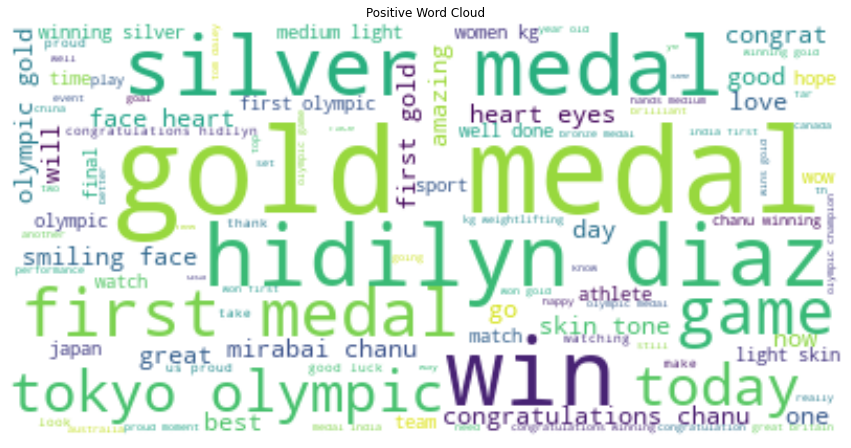

In [ ]:
# Get positive wordcloud
stopwords = set(STOPWORDS)

# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(pos_text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Word Cloud')
plt.show()

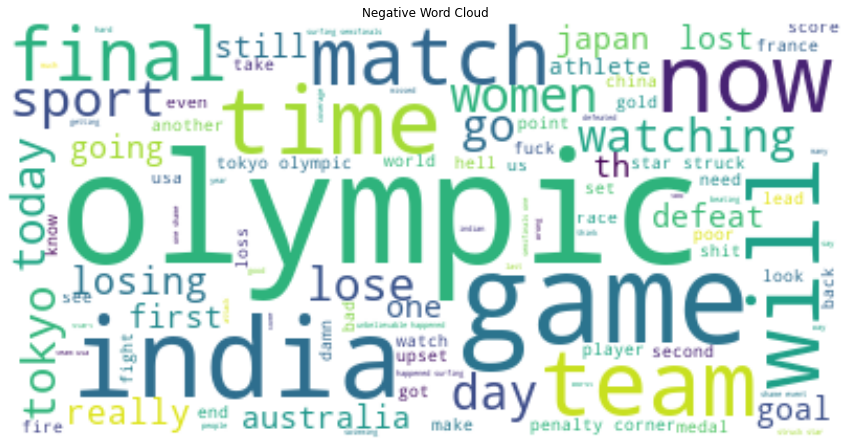

In [ ]:
# Get negative wordcloud
stopwords = set(STOPWORDS)

# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(neg_text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Word Cloud')
plt.show()

In [ ]:
neu_text = neu_text.replace("nan","")

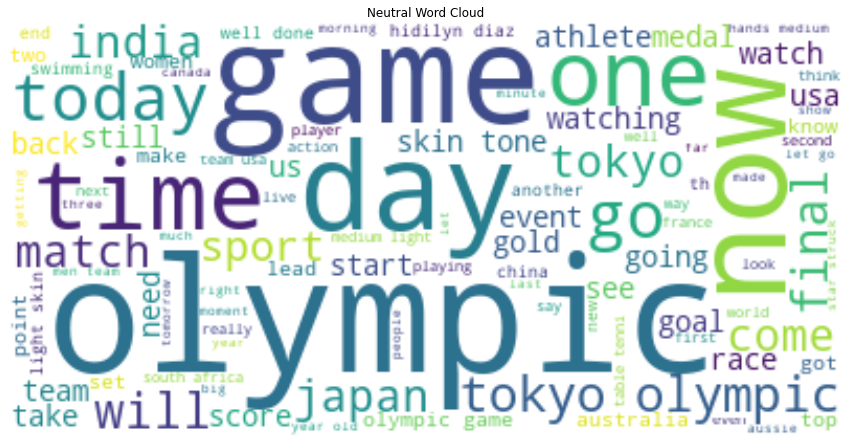

In [ ]:
# Get neutral wordcloud
stopwords = set(STOPWORDS)

# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(neu_text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Neutral Word Cloud')
plt.show()

In [ ]:
database_with_hash.to_csv('database_with_hash.csv',index=False)

### We codify the other features as numerical (categorical) values



In [ ]:
data_encoded = database_with_hash.copy()
data_encoded = data_encoded.drop(columns=['user_description','id','user_name','text'])
data_encoded

user_location user_followers  ... buy HidilynDiaz
0                Udupi, India             45  ...   0           0
1              Manipur, India           5235  ...   0           0
2                      Global           3646  ...   0           0
3                    Lausanne         103975  ...   0           0
4                   Australia              6  ...   0           0
...                       ...            ...  ...  ..         ...
297006               Brussels           5296  ...   0           0
297007  Lausanne. Switzerland         147657  ...   0           0
297008       Toronto, Ontario          44209  ...   0           0
297009                     東京            149  ...   0           0
297010      San Francisco, CA            343  ...   0           0

[297011 rows x 64 columns]

In [ ]:
data_encoded['user_location'] = data_encoded['user_location'].fillna('Not Available')
data_encoded['source'] = data_encoded['source'].fillna('None')
data_encoded = data_encoded[data_encoded['is_retweet'].notna()]
data_encoded['user_location'] = data_encoded['user_location'].fillna('Not Available')
data_encoded = data_encoded[data_encoded['user_verified'].notna()]
data_encoded.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


user_location      0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
                  ..
USAvAUS            0
MaryKom            0
Diving             0
buy                0
HidilynDiaz        0
Length: 64, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
data_encoded.reset_index()
labelencoder = LabelEncoder()

data_encoded['user_location'] = labelencoder.fit_transform(data_encoded['user_location'])
data_encoded['source'] = labelencoder.fit_transform(data_encoded['source'])
data_encoded['user_verified'] = data_encoded['user_verified'].replace(['False',False], value=0)
data_encoded['user_verified'] = data_encoded['user_verified'].replace(['True',True], value=1)

data_encoded['is_retweet'] = data_encoded['is_retweet'].replace(['False',False], value=0)
data_encoded['is_retweet'] = data_encoded['is_retweet'].replace(['True',True], value=1)

data_encoded['user_friends'] = pd.to_numeric(data_encoded['user_friends']) 
data_encoded['user_favourites'] = pd.to_numeric(data_encoded['user_favourites']) 

In [ ]:
data_encoded

user_location user_followers  user_friends  ...  Diving  buy  HidilynDiaz
0               16921             45          39.0  ...       0    0            0
1               10125           5235           5.0  ...       0    0            0
2                6095           3646           3.0  ...       0    0            0
3                8976         103975        2724.0  ...       0    0            0
4                1691              6          37.0  ...       0    0            0
...               ...            ...           ...  ...     ...  ...          ...
297006           3038           5296         161.0  ...       0    0            0
297007           8981         147657         712.0  ...       0    0            0
297008          16553          44209        2317.0  ...       0    0            0
297009          21299            149         245.0  ...       0    0            0
297010          14246            343         273.0  ...       0    0            0

[160525 rows x 64 columns]

In [ ]:
data_encoded.to_csv('data_encoded.csv',index=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

y = data_encoded['class']
X = data_encoded.drop(columns=['class'])
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X.values, y, cv=5)


NameError: ignored

In [ ]:
scores